In [1]:
import sim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pretty_plots import plot_pretty

In [2]:
def generate(dist,propmass = True, mass = 1):
    if propmass:
        a = np.array([[0,0.,0.,0.,dist * mass],[1,dist,0.,0.,dist * mass]])
    else:
        a = np.array([[0,0.,0.,0.,mass],[1,dist,0.,0.,mass]])
    df = pd.DataFrame(a,columns=["id","x","y","z","mass"])
    df["id"] = df["id"].astype(int)
    return df
print(generate(5))


   id    x    y    z  mass
0   0  0.0  0.0  0.0   5.0
1   1  5.0  0.0  0.0   5.0


In [3]:
def get_2_part_phi(min=-3.5,max=0,step=200,precision="f4",propmass=True,mass=1,eps=0):
    dists = 10**np.linspace(min,max,step)
    output = np.zeros_like(dists)
    for i,dist in enumerate(dists):
        df = generate(dist,propmass,mass)
        out,stats = sim.static_solver.evaluate(df,df,precision=precision,eps=eps)
        output[i] = np.sum(out)/2
    return output,dists

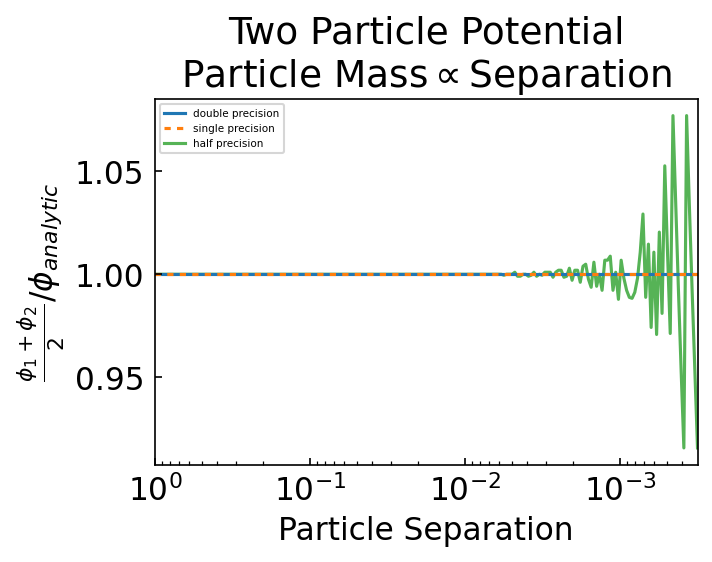

In [4]:
f4,dists = get_2_part_phi(precision="f4",propmass=True)
f8,dists = get_2_part_phi(precision="f8",propmass=True)
f2,dists = get_2_part_phi(precision="f2",propmass=True)

plot_pretty()
plt.plot(dists,f8/-1,label="double precision",zorder=0)
plt.plot(dists,f4/-1,':',label="single precision",zorder=1)
plt.plot(dists,f2/-1,label="half precision",alpha=0.8,zorder=-1)
plt.xlim(np.max(dists),np.min(dists))
plt.xscale('log')
plt.legend()
plt.ylabel(r"$\frac{\phi_{1} + \phi_{2}}{2}/\phi_{analytic}$")
plt.title("Two Particle Potential\n" + r"Particle Mass$\propto$Separation")
plt.xlabel("Particle Separation")
plt.tight_layout()
#plt.savefig("plots/two_particle/mass_prop_distance.jpg")

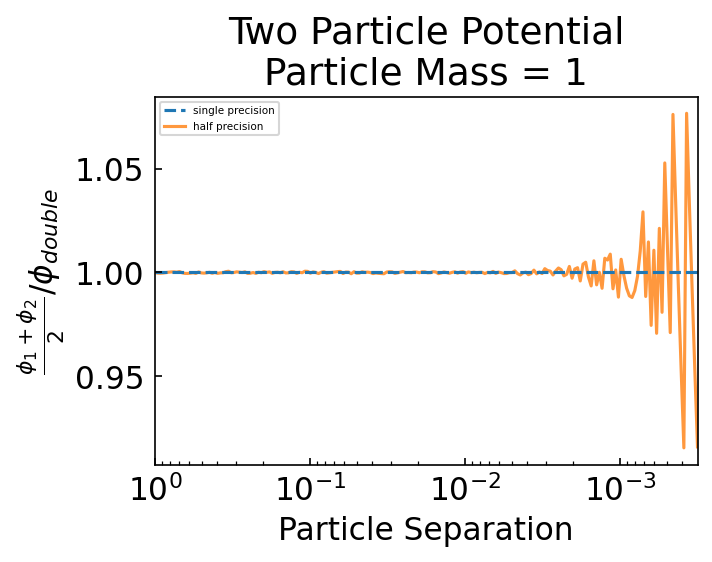

In [5]:
f4,dists = get_2_part_phi(precision="f4",propmass=False)
f8,dists = get_2_part_phi(precision="f8",propmass=False)
f2,dists = get_2_part_phi(precision="f2",propmass=False)

plot_pretty()
plt.plot(dists,f4/f8,'--',label="single precision",zorder=1)
plt.plot(dists,f2/f8,label="half precision",alpha=0.8,zorder=0)
plt.xscale('log')
plt.legend()
plt.xlim(np.max(dists),np.min(dists))
plt.ylabel(r"$\frac{\phi_{1} + \phi_{2}}{2}/\phi_{double}$")
plt.title("Two Particle Potential\n" + r"Particle Mass = 1")
plt.xlabel("Particle Separation")
plt.tight_layout()
plt.savefig("plots/two_particle/mass_constant.jpg")
plt.show()

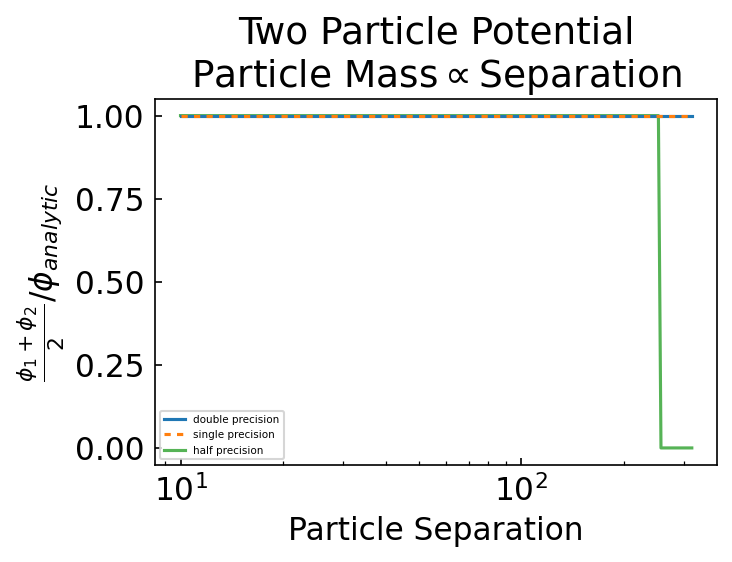

In [6]:
minimum = 1
maximum = 2.5
f4,dists = get_2_part_phi(precision="f4",propmass=True,min=minimum,max=maximum)
f8,dists = get_2_part_phi(precision="f8",propmass=True,min=minimum,max=maximum)
f2,dists = get_2_part_phi(precision="f2",propmass=True,min=minimum,max=maximum)

plot_pretty()
plt.plot(dists,f8/-1,label="double precision",zorder=0)
plt.plot(dists,f4/-1,':',label="single precision",zorder=1)
plt.plot(dists,f2/-1,label="half precision",alpha=0.8,zorder=-1)
#plt.xlim(np.max(dists),np.min(dists))
plt.xscale('log')
plt.legend()
plt.ylabel(r"$\frac{\phi_{1} + \phi_{2}}{2}/\phi_{analytic}$")
plt.title("Two Particle Potential\n" + r"Particle Mass$\propto$Separation")
plt.xlabel("Particle Separation")
plt.tight_layout()
plt.savefig("plots/two_particle/high_mass_prop_distance.jpg")

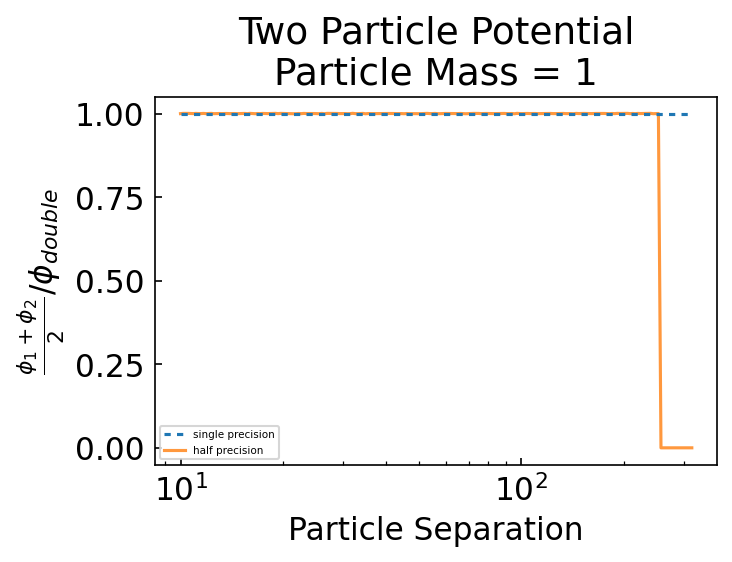

In [7]:
minimum = 1
maximum = 2.5
f4,dists = get_2_part_phi(precision="f4",propmass=False,min=minimum,max=maximum)
f8,dists = get_2_part_phi(precision="f8",propmass=False,min=minimum,max=maximum)
f2,dists = get_2_part_phi(precision="f2",propmass=False,min=minimum,max=maximum)

plot_pretty()
plt.plot(dists,f4/f8,':',label="single precision",zorder=1)
plt.plot(dists,f2/f8,label="half precision",alpha=0.8,zorder=-1)
#plt.xlim(np.max(dists),np.min(dists))
plt.xscale('log')
plt.legend()
plt.ylabel(r"$\frac{\phi_{1} + \phi_{2}}{2}/\phi_{double}$")
plt.title("Two Particle Potential\n" + r"Particle Mass = 1")
plt.xlabel("Particle Separation")
plt.tight_layout()
plt.savefig("plots/two_particle/high_mass_constant.jpg")

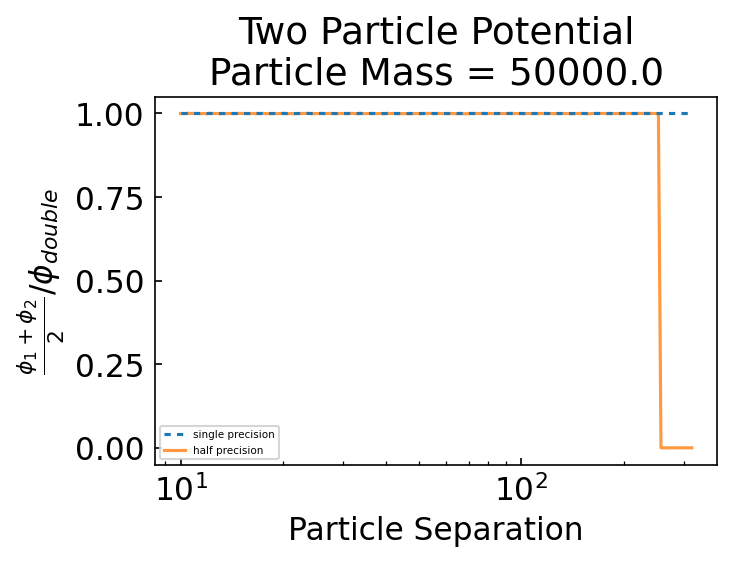

In [8]:
minimum = 1
maximum = 2.5
mass = 5e4
f4,dists = get_2_part_phi(precision="f4",propmass=False,min=minimum,max=maximum,mass=mass)
f8,dists = get_2_part_phi(precision="f8",propmass=False,min=minimum,max=maximum,mass=mass)
f2,dists = get_2_part_phi(precision="f2",propmass=False,min=minimum,max=maximum,mass=mass)

plot_pretty()
plt.plot(dists,f4/f8,':',label="single precision",zorder=1)
plt.plot(dists,f2/f8,label="half precision",alpha=0.8,zorder=-1)
#plt.xlim(np.max(dists),np.min(dists))
plt.xscale('log')
plt.legend()
plt.ylabel(r"$\frac{\phi_{1} + \phi_{2}}{2}/\phi_{double}$")
plt.title("Two Particle Potential\n" + r"Particle Mass = " + str(mass))
plt.xlabel("Particle Separation")
plt.tight_layout()
plt.savefig("plots/two_particle/high_mass_" + str(mass).replace(".",",") + ".jpg")

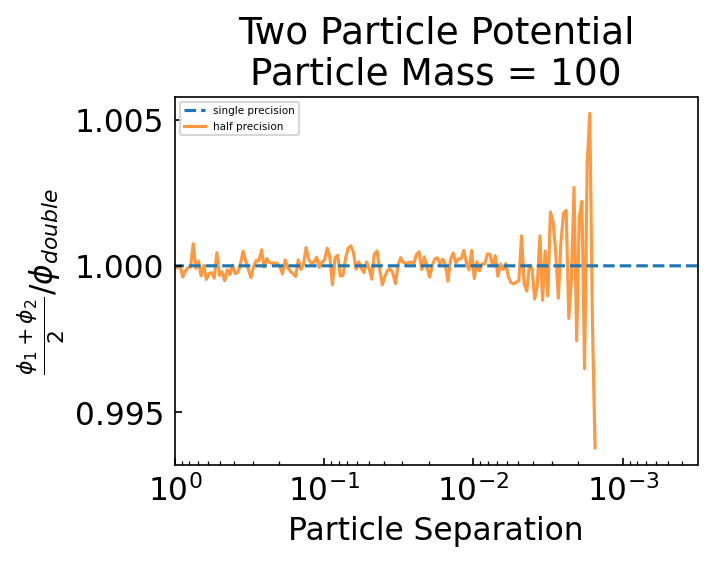

In [9]:
mass = 100
f4,dists = get_2_part_phi(precision="f4",propmass=False,mass=mass)
f8,dists = get_2_part_phi(precision="f8",propmass=False,mass=mass)
f2,dists = get_2_part_phi(precision="f2",propmass=False,mass=mass)

plot_pretty()
plt.plot(dists,f4/f8,'--',label="single precision",zorder=1)
plt.plot(dists,f2/f8,label="half precision",alpha=0.8,zorder=0)
plt.xscale('log')
plt.legend()
plt.xlim(np.max(dists),np.min(dists))
plt.ylabel(r"$\frac{\phi_{1} + \phi_{2}}{2}/\phi_{double}$")
plt.title("Two Particle Potential\n" + r"Particle Mass = " + str(mass))
plt.xlabel("Particle Separation")
plt.tight_layout()
plt.savefig("plots/two_particle/mass_constant_" + str(mass).replace(".",",") + ".jpg")
plt.show()

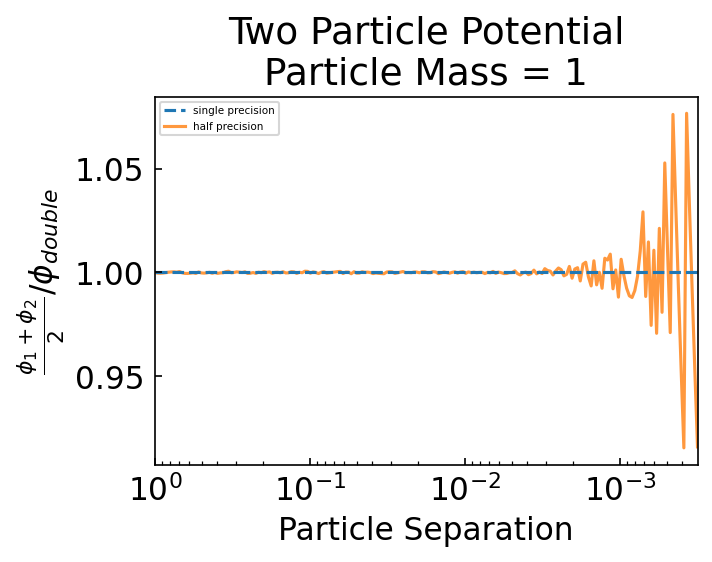

In [5]:
f4,dists = get_2_part_phi(precision="f4",propmass=False)
f8,dists = get_2_part_phi(precision="f8",propmass=False)
f2,dists = get_2_part_phi(precision="f2",propmass=False)

plot_pretty()
plt.plot(dists,f4/f8,'--',label="single precision",zorder=1)
plt.plot(dists,f2/f8,label="half precision",alpha=0.8,zorder=0)
plt.xscale('log')
plt.legend()
plt.xlim(np.max(dists),np.min(dists))
plt.ylabel(r"$\frac{\phi_{1} + \phi_{2}}{2}/\phi_{double}$")
plt.title("Two Particle Potential\n" + r"Particle Mass = 1")
plt.xlabel("Particle Separation")
plt.tight_layout()
plt.savefig("plots/two_particle/mass_constant_softened.jpg")
plt.show()

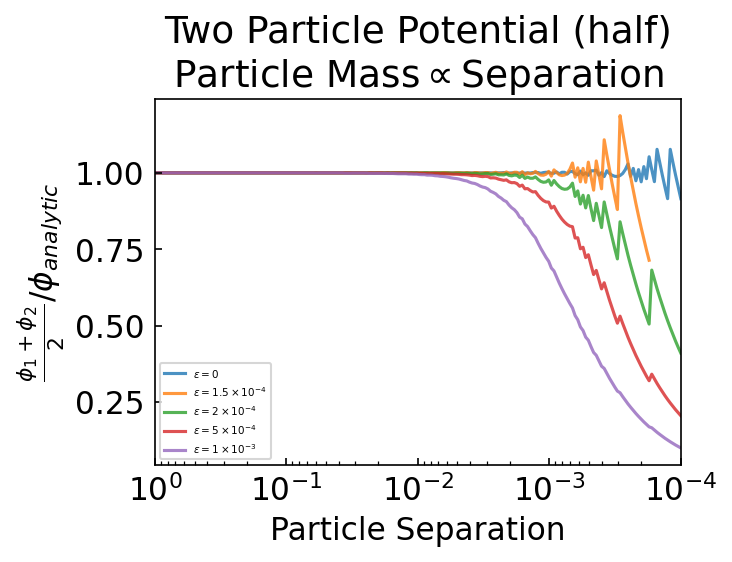

In [21]:
minimum = -4
f2,dists = get_2_part_phi(precision="f2",propmass=True,eps=0)
f2_soft_1_10,dists = get_2_part_phi(precision="f2",propmass=True,eps=5e-4,min=minimum)
f2_soft_1,dists = get_2_part_phi(precision="f2",propmass=True,eps=1e-3,min=minimum)
f2_soft_3,dists = get_2_part_phi(precision="f2",propmass=True,eps=2e-4,min=minimum)
f2_soft_4,dists = get_2_part_phi(precision="f2",propmass=True,eps=1.5e-4,min=minimum)

plot_pretty()
plt.plot(dists,f2/-1,label=r"$\epsilon = 0$",alpha=0.8,zorder=-1)
plt.plot(dists,f2_soft_4/-1,label=r"$\epsilon = 1.5\times 10^{-4}$",alpha=0.8,zorder=-1)
plt.plot(dists,f2_soft_3/-1,label=r"$\epsilon = 2\times 10^{-4}$",alpha=0.8,zorder=-1)
plt.plot(dists,f2_soft_1_10/-1,label=r"$\epsilon = 5\times 10^{-4}$",alpha=0.8,zorder=-1)
plt.plot(dists,f2_soft_1/-1,label=r"$\epsilon = 1\times 10^{-3}$",alpha=0.8,zorder=-1)
plt.xlim(np.max(dists),np.min(dists))
plt.xscale('log')
plt.legend()
plt.ylabel(r"$\frac{\phi_{1} + \phi_{2}}{2}/\phi_{analytic}$")
plt.title("Two Particle Potential (half)\n" + r"Particle Mass$\propto$Separation")
plt.xlabel("Particle Separation")
plt.tight_layout()
plt.savefig("plots/two_particle/mass_prop_distance_softened.jpg")

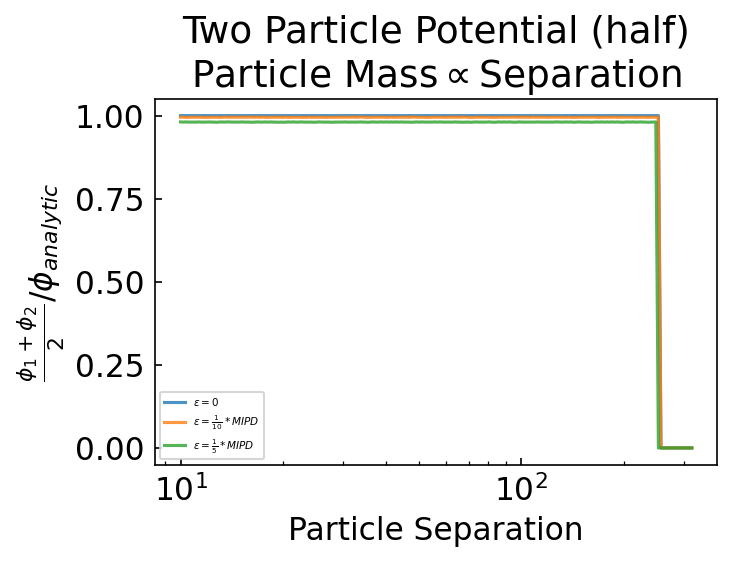

In [4]:
minimum = 1
maximum = 2.5

f2,dists = get_2_part_phi(precision="f2",propmass=True,eps_frac=0,min=minimum,max=maximum)
f2_soft_1_10,dists = get_2_part_phi(precision="f2",propmass=True,eps_frac=1/10,min=minimum,max=maximum)
f2_soft_1,dists = get_2_part_phi(precision="f2",propmass=True,eps_frac=1/5,min=minimum,max=maximum)

plot_pretty()
plt.plot(dists,f2/-1,label=r"$\epsilon = 0$",alpha=0.8,zorder=-1)
plt.plot(dists,f2_soft_1_10/-1,label=r"$\epsilon = \frac{1}{10} * MIPD$",alpha=0.8,zorder=-1)
plt.plot(dists,f2_soft_1/-1,label=r"$\epsilon = \frac{1}{5} * MIPD$",alpha=0.8,zorder=-1)
#plt.xlim(np.max(dists),np.min(dists))
plt.xscale('log')
plt.legend()
plt.ylabel(r"$\frac{\phi_{1} + \phi_{2}}{2}/\phi_{analytic}$")
plt.title("Two Particle Potential (half)\n" + r"Particle Mass$\propto$Separation")
plt.xlabel("Particle Separation")
plt.tight_layout()
plt.savefig("plots/two_particle/high_mass_prop_distance_softened.jpg")

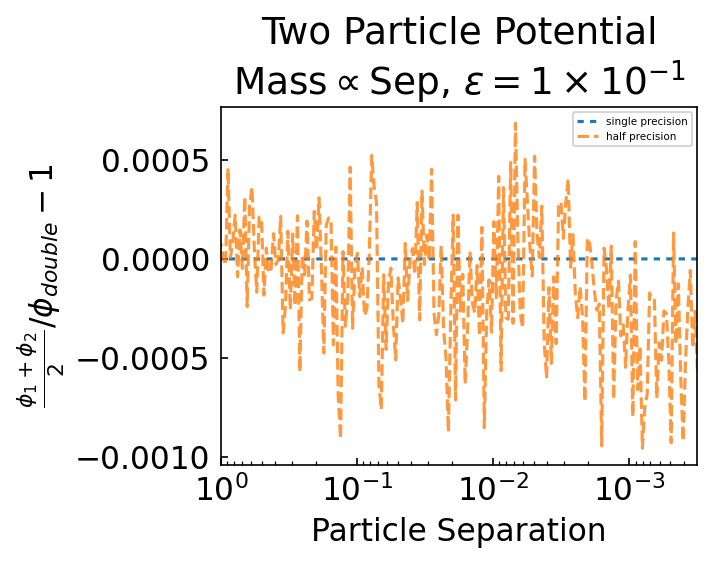

In [24]:
eps = 1e-1
f4,dists = get_2_part_phi(precision="f4",propmass=True,eps=eps)
f8,dists = get_2_part_phi(precision="f8",propmass=True,eps=eps)
f2,dists = get_2_part_phi(precision="f2",propmass=True,eps=eps)

plot_pretty()
plt.plot(dists,f4/f8 - 1,':',label="single precision",zorder=1)
plt.plot(dists,f2/f8 - 1,'--',label="half precision",alpha=0.8,zorder=2)
plt.xlim(np.max(dists),np.min(dists))
plt.xscale('log')
plt.legend()
plt.ylabel(r"$\frac{\phi_{1} + \phi_{2}}{2}/\phi_{double} - 1$")
plt.title("Two Particle Potential\n" + r"Mass$\propto$Sep, $\epsilon = 1\times 10^{-1}$")
plt.xlabel("Particle Separation")
plt.tight_layout()
plt.savefig("plots/two_particle/force_smoothing_diff_e1.jpg")

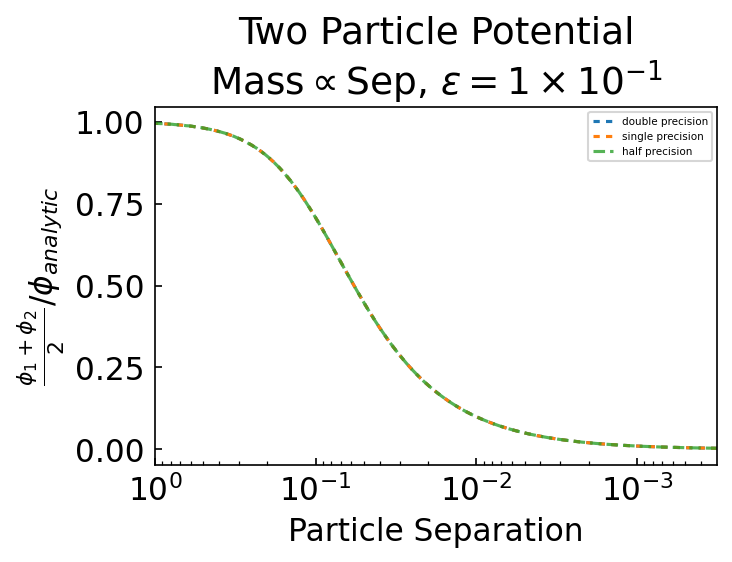

In [25]:
eps = 1e-1
f4,dists = get_2_part_phi(precision="f4",propmass=True,eps=eps)
f8,dists = get_2_part_phi(precision="f8",propmass=True,eps=eps)
f2,dists = get_2_part_phi(precision="f2",propmass=True,eps=eps)

plot_pretty()
plt.plot(dists,f8/-1,':',label="double precision",zorder=1)
plt.plot(dists,f4/-1,':',label="single precision",zorder=1)
plt.plot(dists,f2/-1,'--',label="half precision",alpha=0.8,zorder=2)
plt.xlim(np.max(dists),np.min(dists))
plt.xscale('log')
plt.legend()
plt.ylabel(r"$\frac{\phi_{1} + \phi_{2}}{2}/\phi_{analytic}$")
plt.title("Two Particle Potential\n" + r"Mass$\propto$Sep, $\epsilon = 1\times 10^{-1}$")
plt.xlabel("Particle Separation")
plt.tight_layout()
plt.savefig("plots/two_particle/force_smoothing_demo_e1.jpg")